# Đề bài:  
Use the k-means algorithm and Euclidean distance to cluster the following 8 examples into 3 clusters: A1=(2,10), A2 (2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9).  
Suppose that the initial seeds (centers of each cluster) are A1, A4 and A7. Run the k-means algorithm for 1 epoch only. At the end of this epoch show:  
a. The new clusters (i.e. the examples belonging to each cluster)  
b. The centers of the new clusters  
c. Draw a 10 by 10 space with all the 8 points and show the clusters after the first epoch and the new centroids.  
d. How many more iterations are needed to converge? Draw the result for each epoch.  

# Temp 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign examples to clusters
def assign_clusters(examples, centers):
    clusters = [[] for _ in range(len(centers))]
    for example in examples:
        distances = [euclidean_distance(example, center) for center in centers]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(example)
    return clusters

# Function to update cluster centers
def update_centers(clusters):
    centers = [np.mean(cluster, axis=0) for cluster in clusters]
    return centers

# Function to visualize clusters and centers
def visualize_clusters(examples, clusters, centers):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], color=colors[i], marker='x', s=100, label=f'Center {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters after 1 Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# Examples
examples = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initial centers
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Initial clusters assignment
clusters = assign_clusters(examples, initial_centers)

# Update centers
new_centers = update_centers(clusters)

# Visualize clusters after 1 epoch
visualize_clusters(examples, clusters, new_centers)

# Check convergence
convergence = np.all(initial_centers == new_centers)
if convergence:
    print("The algorithm has converged after 1 epoch.")
else:
    print("The algorithm has not yet converged.")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign examples to clusters
def assign_clusters(examples, centers):
    clusters = [[] for _ in range(len(centers))]
    for example in examples:
        distances = [euclidean_distance(example, center) for center in centers]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(example)
    return clusters

# Function to update cluster centers
def update_centers(clusters):
    centers = [np.mean(cluster, axis=0) for cluster in clusters]
    return centers

# Function to visualize clusters and centers
def visualize_clusters(examples, clusters, centers):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
        # Calculate the bounding box of the cluster
        min_x, min_y = np.min(cluster, axis=0)
        max_x, max_y = np.max(cluster, axis=0)
        # Create a rectangle to cover the cluster
        rect = Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, linewidth=1, edgecolor=colors[i], facecolor='none', label=f'Cluster {i+1} Area')
        plt.gca().add_patch(rect)
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], color=colors[i], marker='x', s=100, label=f'Center {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters after 1 Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# Examples
examples = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initial centers
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Initial clusters assignment
clusters = assign_clusters(examples, initial_centers)

# Update centers
new_centers = update_centers(clusters)

# Visualize clusters after 1 epoch
visualize_clusters(examples, clusters, new_centers)

# Check convergence
convergence = np.all(initial_centers == new_centers)
if convergence:
    print("The algorithm has converged after 1 epoch.")
else:
    print("The algorithm has not yet converged.")


# Bài làm chính 

In [10]:
# Prepare first
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to assign examples to clusters
def assign_clusters(examples, centers):
    clusters = [[] for _ in range(len(centers))]
    for example in examples:
        distances = [euclidean_distance(example, center) for center in centers]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(example)
    return clusters

# Function to update cluster centers
def update_centers(clusters):
    centers = [np.mean(cluster, axis=0) for cluster in clusters]
    return centers

# Function to visualize clusters and centers
def visualize_clusters(number, clusters, centers):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
        if len(cluster) == 1:  # If cluster has only one point
            circle = Circle((cluster[0][0], cluster[0][1]), 1, color=colors[i], fill=False, linestyle='dotted')
        else:
            # Calculate the center and radius of the circle to cover the cluster
            center = np.mean(cluster, axis=0)
            radius = max([euclidean_distance(point, center) for point in cluster])
            circle = Circle((center[0], center[1]), radius, color=colors[i], fill=False)
        plt.gca().add_patch(circle)
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], color=colors[i], marker='x', s=100, label=f'Center {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Clusters after {number} Epoch')
    # Place legend in the upper right corner
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Examples
examples = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initial centers
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Initial clusters assignment
clusters = assign_clusters(examples, initial_centers)

# Update centers
new_centers = update_centers(clusters)



In [11]:
# a
clusters

[[array([ 2, 10])],
 [array([8, 4]), array([5, 8]), array([7, 5]), array([6, 4]), array([4, 9])],
 [array([2, 5]), array([1, 2])]]

In [12]:
# b
new_centers

[array([ 2., 10.]), array([6., 6.]), array([1.5, 3.5])]

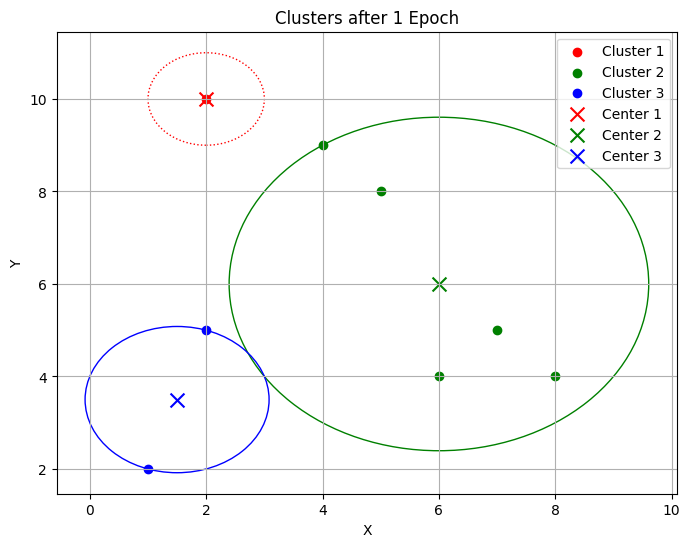

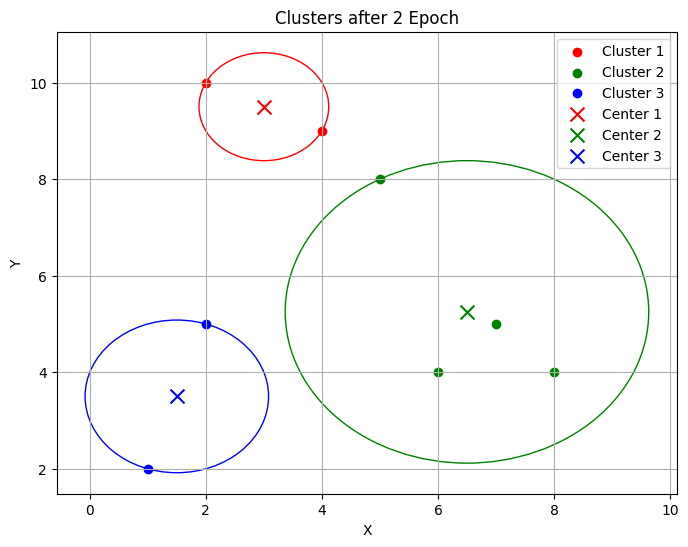

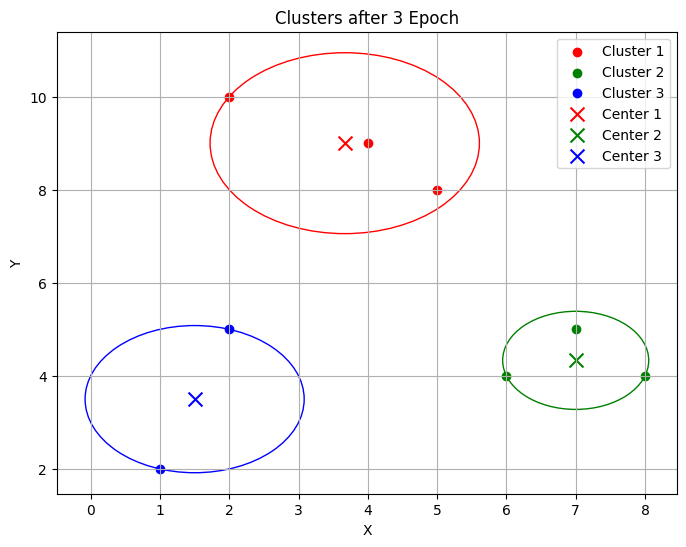

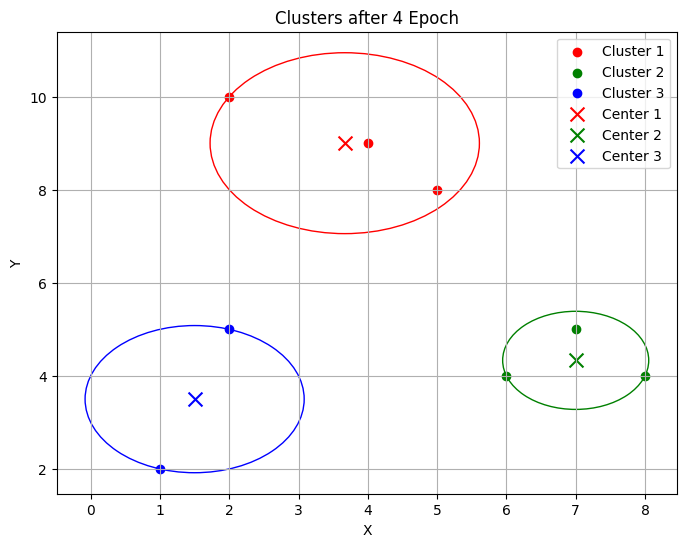

Converged after 4 epochs.


In [13]:
import numpy as np

# Function to check convergence
def check_convergence(prev_centers, new_centers, tolerance=1e-4):
    prev_centers = np.array(prev_centers)
    new_centers = np.array(new_centers)
    return np.all(np.abs(prev_centers - new_centers) < tolerance)

# Function to perform k-means clustering
def k_means(examples, initial_centers, max_iterations=100):
    centers = initial_centers.copy()
    for epoch in range(max_iterations):
        prev_centers = centers.copy()
        # Assign examples to clusters
        clusters = assign_clusters(examples, centers)
        # Update centers
        centers = update_centers(clusters)
        # Visualize clusters and centers for each epoch
        visualize_clusters(epoch + 1, clusters, centers)
        # Check convergence
        if check_convergence(prev_centers, centers):
            print(f"Converged after {epoch+1} epochs.")
            break
    else:
        print("Maximum iterations reached. Convergence not achieved.")
    return clusters, centers

# Perform k-means clustering
clusters, centers = k_means(examples, initial_centers)


In [14]:
from PIL import Image

# Tạo một danh sách các tên tệp ảnh theo thứ tự tăng dần
file_names = [f'epoch{i}.png' for i in range(1, 5)]

# Mở tất cả các tệp ảnh và thêm chúng vào danh sách
images = [Image.open(file_name) for file_name in file_names]

# Lấy kích thước của ảnh đầu tiên
width, height = images[0].size

# Tạo một ảnh mới với kích thước của ảnh đầu tiên và đặt màu nền là trắng
combined_image = Image.new('RGB', (width, height * len(images)), color='white')

# Ghép các ảnh vào ảnh kết quả
for i, img in enumerate(images):
    combined_image.paste(img, (0, i * height))

# Lưu ảnh kết quả
combined_image.save('combined_image.png')

# Đóng tất cả các ảnh đã mở
for img in images:
    img.close()

In [15]:
!pwd

/mnt/DataK/Univer/UniSubject/_3th_year/_2nd_term/3ii_DM/Lec_Ass/Week8/HomeworkLT


In [16]:
!ls

Clustering.ipynb    epoch1.png	epoch3.png
combined_image.jpg  epoch2.png	epoch4.png
